In [1]:
from qutip import *
import numpy as np
from scipy import constants
import datetime
import time
import gc
import sys
import matplotlib.pyplot as plt
from tqdm import tqdm
import multiprocessing as mp
from numpy.linalg import inv
from numpy import linalg as LA
from scipy.optimize import minimize_scalar
import math
from scipy.optimize import curve_fit
from scipy.sparse.linalg import eigs

In [2]:
#basis {e,+,0,-}
N = 4
e = basis(N,0)
p = basis(N,1)
z = basis(N,2)
m = basis(N,3)

## rest ion

In [4]:
def pope(Gamma,Omegasp,Omegasm,Omegap,Deltad,Deltap,deltab,Dmin,Dmax,nn):

    pop_e = []

    tstart = time.time();

    #linbland operator/collapse operators
    c1 = np.sqrt(Gamma/3)*p*e.dag()
    c2 = np.sqrt(Gamma/3)*z*e.dag()
    c3 = np.sqrt(Gamma/3)*m*e.dag()

    c = [c1,c2,c3]
    #c_ops =[spre(c[i])*spost(c[i].dag()) - 0.5*(spre(c[i].dag()*c[i]) + spost(c[i].dag()*c[i])) for i in range(N-1)]


    for Deltap in tqdm(np.linspace(Dmin,Dmax,nn)):

        #Hamiltonian for a rest ion
        H1 = -0.5*(Omegasm*e*p.dag() + Omegap*e*z.dag() + Omegasp*e*m.dag())
        H2 = -0.5*Omegasm*p*e.dag() + (Deltad + deltab)*p*p.dag()
        H3 = -0.5*Omegap*z*e.dag() + Deltap*z*z.dag()
        H4 = -0.5*Omegasp*m*e.dag() + (Deltad - deltab)*m*m.dag()

        H = H1 + H2 + H3 + H4

        #rho = mesolve(H,rho0,tlist,c_ops,[e*e.dag()],options=options)
        rho = steadystate(H,c)
    
        pop_e.append(expect(e*e.dag(),rho))

    return pop_e

In [5]:
plt.rcParams.update({'font.size': 14})

In [6]:
#parameters 1/2π (MHz) following notation from  PRL 126, 023604
Gamma = 20
Deltad = 60
Omegasp = 16.5
Omegasm = Omegasp
Omegap = 0.5*Omegasp
deltab = 10
Deltap = Deltad + deltab #metavlito
Dmin = 67
Dmax = 73
nn = 2000

In [7]:
pop_e = pope(Gamma,Omegasp,Omegasm,Omegap,Deltad,Deltap,deltab,Dmin,Dmax,nn)

100%|██████████| 2000/2000 [00:00<00:00, 2532.18it/s]


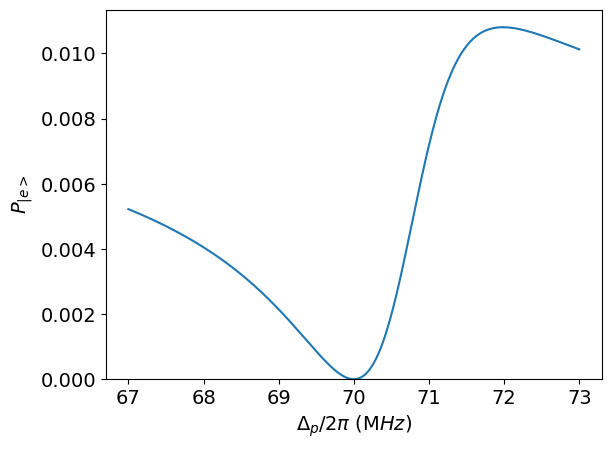

In [8]:
plt.figure()
#plt.plot(np.linspace(-10*GammaJgJe,20*GammaJgJe,200),pope1)
plt.plot(np.linspace(Dmin,Dmax,nn),pop_e)
plt.ylabel('$P_{|e>}$')
plt.xlabel('$Δ_{p}/2π \ (ΜHz)$')
plt.ylim(0)

#plt.xlim(18,28)

#plt.savefig("Lu_eit_e_pi.png",bbox_inches = "tight")
plt.show()

In [9]:
#parameters Ytterbium 1/2π (MHz)
Gamma = 20
Deltad = 60
Omegasp = 16.5
Omegasm = Omegasp
Omegap = 0.75*Omegasp
deltab = 10
Deltap = Deltad + deltab #metavlito

In [10]:
pop_e1 = pope(Gamma,Omegasp,Omegasm,Omegap,Deltad,Deltap,deltab,Dmin,Dmax,nn)

100%|██████████| 2000/2000 [00:00<00:00, 2456.79it/s]


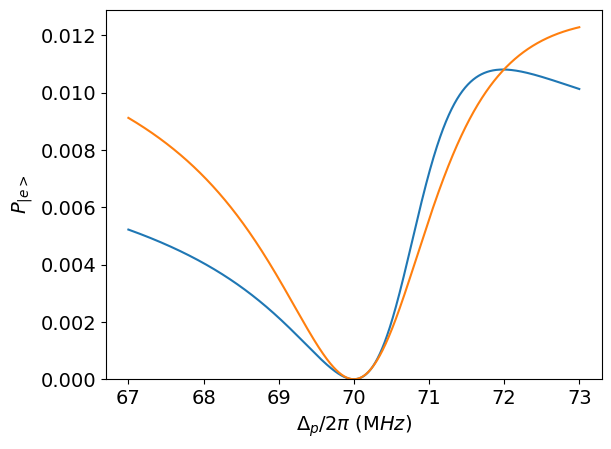

In [12]:
plt.figure()
#plt.plot(np.linspace(-10*GammaJgJe,20*GammaJgJe,200),pope1)
plt.plot(np.linspace(Dmin,Dmax,nn),pop_e)
plt.plot(np.linspace(Dmin,Dmax,nn),pop_e1)
#plt.axvline(60.2)

plt.ylabel('$P_{|e>}$')
plt.xlabel('$Δ_{p}/2π \ (ΜHz)$')
plt.ylim(0)

#plt.xlim(57,65)
#plt.legend()

#plt.savefig("Lu_eit_e_pi.png",bbox_inches = "tight")
plt.show()

In [13]:
#parameters Ytterbium 1/2π (MHz)
Gamma = 20
Deltad = 60
Omegasp = 16.5
Omegasm = Omegasp
Omegap = Omegasp
deltab = 10
Deltap = Deltad + deltab #metavlito
omega = 2 #trap frequency

In [14]:
pop_e2 = pope(Gamma,Omegasp,Omegasm,Omegap,Deltad,Deltap,deltab,Dmin,Dmax,nn)

100%|██████████| 2000/2000 [00:00<00:00, 2619.26it/s]


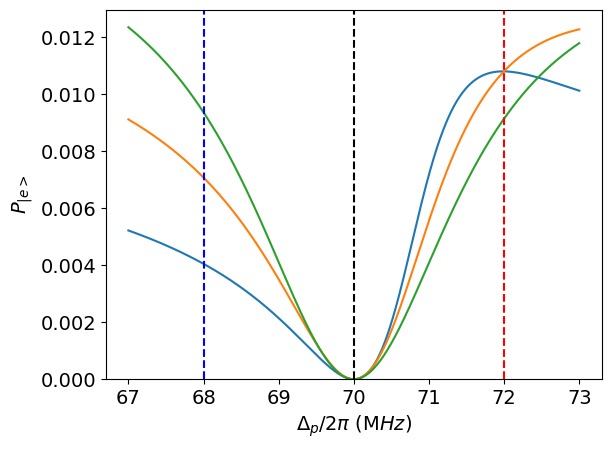

In [15]:
plt.figure()
#plt.plot(np.linspace(-10*GammaJgJe,20*GammaJgJe,200),pope1)
plt.plot(np.linspace(Dmin,Dmax,nn),pop_e)
plt.plot(np.linspace(Dmin,Dmax,nn),pop_e1)
plt.plot(np.linspace(Dmin,Dmax,nn),pop_e2)

plt.axvline(Deltap+omega, linestyle='--',color='red')
plt.axvline(Deltap, linestyle='--',color='black')
plt.axvline(Deltap-omega, linestyle='--',color='blue')
#plt.axvline(60.2)

plt.ylabel('$P_{|e>}$')
plt.xlabel('$Δ_{p}/2π \ (ΜHz)$')
plt.ylim(0)

#plt.xlim(57,65)
#plt.legend()

#plt.savefig("Lu_eit_e_pi.png",bbox_inches = "tight")
plt.show()

In [16]:
#M = 171
#lamda = 369.5*1e-09
#eta=(2*pi/lamda)*np.sqrt(hbar/(2*M*amu*2*pi*omega*MHz))
#eta

In [17]:
eta=0.01

In [18]:
step = (Dmax-Dmin)/nn

In [19]:
pop_e[int((Deltap+omega - Dmin)/step)] - pop_e[int((Deltap - omega - Dmin)/step)]

0.0067540387516526745

In [20]:
pop_e1[int((Deltap+omega - Dmin)/step)] - pop_e1[int((Deltap - omega - Dmin)/step)]

0.00373497537885736

In [21]:
pop_e2[int((Deltap+omega - Dmin)/step)] - pop_e2[int((Deltap - omega - Dmin)/step)]

-0.0002193355266298415

In [22]:
wabs = eta**2*2*np.pi*Gamma*np.array([pop_e[int((Deltap+omega - Dmin)/step)] - pop_e[int((Deltap - omega - Dmin)/step)],
                                      pop_e1[int((Deltap+omega - Dmin)/step)] - pop_e1[int((Deltap - omega - Dmin)/step)], 
                 pop_e2[int((Deltap+omega - Dmin)/step)] - pop_e2[int((Deltap - omega - Dmin)/step)]
                                     ])

In [23]:
wabs

array([ 8.48737541e-05,  4.69350848e-05, -2.75625152e-06])

## fictitious lasers

In [24]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [25]:
def steck(Gamma,Omegasp,Omegasm,Omegap,Deltad,Deltap,deltab, eta, Dmin_, Dmax_, nn_):
    H1 = -0.5*(Omegasm*e*p.dag() + Omegap*e*z.dag() + Omegasp*e*m.dag())
    H2 = -0.5*Omegasm*p*e.dag() + (Deltad + deltab)*p*p.dag()
    H3 = -0.5*Omegap*z*e.dag() + Deltap*z*z.dag()
    H4 = -0.5*Omegasp*m*e.dag() + (Deltad - deltab)*m*m.dag()

    H0 = H1 + H2 + H3 + H4

    c1 = np.sqrt(Gamma/3)*p*e.dag()
    c2 = np.sqrt(Gamma/3)*z*e.dag()
    c3 = np.sqrt(Gamma/3)*m*e.dag()

    c = [c1,c2,c3]

    rho0 = steadystate(H0,c)

    L0 = 0*spre(c[0])*spost(c[0].dag())
    for i in range(len(c)):
        L0 += spre(c[i])*spost(c[i].dag()) - 0.5*(spre(c[i].dag()*c[i]) + spost(c[i].dag()*c[i]))

    L0 += -1j*(spre(H0) - spost(H0))
    
    #L0 = np.array(L0)
    L0 = L0.data_as('ndarray')

    H_1 = -0.5*1j*(eta*Omegasm*e*p.dag() -eta*Omegap*e*z.dag() + eta*Omegasp*e*m.dag())
    L_1 = -1j*(spre(H_1) - spost(H_1))

    #L_1 = np.array(L_1)
    L_1 = L_1.data_as('ndarray')

    H1 = H_1.dag()
    L1 = -1j*(spre(H1) - spost(H1))

    #L1 = np.array(L1)
    L1 = L1.data_as('ndarray')
    
    abs = []

    for Deltap in tqdm(np.linspace(Dmin_,Dmax_,nn_)):


        S3 = -np.matmul(inv(L0-3j*Deltap*np.eye(N**2)),L1)
        S2 = -np.matmul(inv(L0-2j*Deltap*np.eye(N**2)+ np.matmul(L_1,S3)),L1)
        #S2 = -np.matmul(inv(L0-2j*Deltap*np.eye(N**2)),L1)
        S1 = -np.matmul(inv(L0-1j*Deltap*np.eye(N**2) + np.matmul(L_1,S2)),L1) 
        #S1 = -np.matmul(inv(L0-1j*Deltap*np.eye(N**2)),L1) 

        T_3 = -np.matmul(inv(L0+3j*Deltap*np.eye(N**2)),L_1)
        T_2 = -np.matmul(inv(L0+2j*Deltap*np.eye(N**2)+ np.matmul(L1,T_3)),L_1)
        #T_2 = -np.matmul(inv(L0+2j*Deltap*np.eye(N**2)),L_1)
        T_1 = -np.matmul(inv(L0+1j*Deltap*np.eye(N**2)+ np.matmul(L1,T_2)),L_1)
        #T_1 = -np.matmul(inv(L0+1j*Deltap*np.eye(N**2)),L_1)
    
        L = np.matmul(L_1,S1) + L0 +np.matmul(L1,T_1)
    
        eigenvalues, eigenvectors = LA.eig(L)

        idx = find_nearest(eigenvalues, 0+0j)
        rhoss = eigenvectors[:,idx]

        rhos = np.zeros((N,N),dtype='complex64')
        for i in range(N):
            for j in range(N):
                rhos[j,i] = rhoss[j+i*N]

        rho = Qobj(rhos)
        if rho.tr() != 0:
            rho = rho/rho.tr()

        rho_ = operator_to_vector(rho)
        #rho_ = np.array(rho_)
        rho_ = rho_.data_as('ndarray')

        rho1 = np.matmul(S1,rho_)
        #rho2 = np.matmul(S2,rho_)
        #rho3 = np.matmul(S3,rho_)

        rho_1 = np.matmul(T_1,rho_)
        #rho_2 = np.matmul(T_2,rho_)
        #rho_3 = np.matmul(T_3,rho_)

        rhos1 = np.zeros((N,N),dtype='complex64')
        #rhos2 = np.zeros((N,N),dtype='complex64')
        #rhos3 = np.zeros((N,N),dtype='complex64')
        rhos_1 = np.zeros((N,N),dtype='complex64')
        #rhos_2 = np.zeros((N,N),dtype='complex64')
        #rhos_3 = np.zeros((N,N),dtype='complex64')
        for i in range(N):
            for j in range(N):
                rhos1[j,i] = rho1[j+i*N]
                #rhos2[j,i] = rho2[j+i*N]
                #rhos3[j,i] = rho3[j+i*N]
                rhos_1[j,i] = rho_1[j+i*N]
                #rhos_2[j,i] = rho_2[j+i*N]
                #rhos_3[j,i] = rho_3[j+i*N]
            
        Rho1 = Qobj(rhos1)
        #Rho2 = Qobj(rhos2)
        #Rho3 = Qobj(rhos3)
        Rho_1 = Qobj(rhos_1)
        #Rho_2 = Qobj(rhos_2)
        #Rho_3 = Qobj(rhos_3)

        abs.append(-2*np.pi*(eta*Omegasm/2*expect(p*e.dag(),Rho_1)  
                            -eta*Omegap/2*expect(z*e.dag(),Rho_1)   
                            +eta*Omegasp/2*expect(m*e.dag(),Rho_1) 
                            +eta*Omegasm/2*(expect(e*p.dag(),Rho1) ) 
                            -eta*Omegap/2*(expect(e*z.dag(),Rho1)  ))
                            +eta*Omegasp/2*(expect(e*m.dag(),Rho1) ) )

    return abs

In [26]:
#parameters Ytterbium 1/2π (MHz) ####2!
Gamma = 20
Deltad = 60
Omegasp = 16.5
Omegasm = Omegasp
Omegap = 0.5*Omegasp
deltab = 10
Deltap = Deltad + deltab #metavlito

Dmin_=-3
Dmax_=3
nn_=2000

In [27]:
pop_es = steck(Gamma,Omegasp,Omegasm,Omegap,Deltad,Deltap,deltab, eta, Dmin_, Dmax_, nn_)

  0%|          | 0/2000 [00:00<?, ?it/s]C:\Users\kfouka\AppData\Local\Temp\ipykernel_13360\1920263864.py:91: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rhos1[j,i] = rho1[j+i*N]
C:\Users\kfouka\AppData\Local\Temp\ipykernel_13360\1920263864.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rhos_1[j,i] = rho_1[j+i*N]
100%|██████████| 2000/2000 [00:01<00:00, 1415.95it/s]


c:\Users\kfouka\AppData\Local\anaconda3\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\kfouka\AppData\Local\anaconda3\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


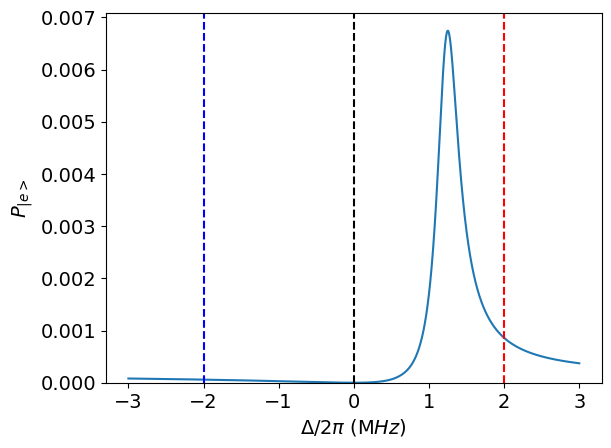

In [28]:
plt.figure()
#plt.plot(np.linspace(-10*GammaJgJe,20*GammaJgJe,200),pope1)
plt.plot(np.linspace(Dmin_,Dmax_,nn_),pop_es)
plt.ylabel('$P_{|e>}$')
plt.xlabel('$Δ/2π \ (ΜHz)$')
plt.axvline(omega, linestyle='--',color='red')
plt.axvline(0, linestyle='--',color='black')
plt.axvline(-omega, linestyle='--',color='blue')
plt.ylim(0)

#plt.xlim(18,28)

#plt.savefig("Lu_eit_e_pi.png",bbox_inches = "tight")
plt.show()

In [29]:
#parameters Ytterbium 1/2π (MHz) ####2!
Gamma = 20
Deltad = 60
Omegasp = 16.5
Omegasm = Omegasp
Omegap = 0.75*Omegasp
deltab = 10
Deltap = Deltad + deltab #metavlito

In [30]:
pop_es1 = steck(Gamma,Omegasp,Omegasm,Omegap,Deltad,Deltap,deltab, eta, Dmin_, Dmax_, nn_)

  0%|          | 0/2000 [00:00<?, ?it/s]C:\Users\kfouka\AppData\Local\Temp\ipykernel_13360\1920263864.py:91: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rhos1[j,i] = rho1[j+i*N]
C:\Users\kfouka\AppData\Local\Temp\ipykernel_13360\1920263864.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rhos_1[j,i] = rho_1[j+i*N]
100%|██████████| 2000/2000 [00:01<00:00, 1604.92it/s]


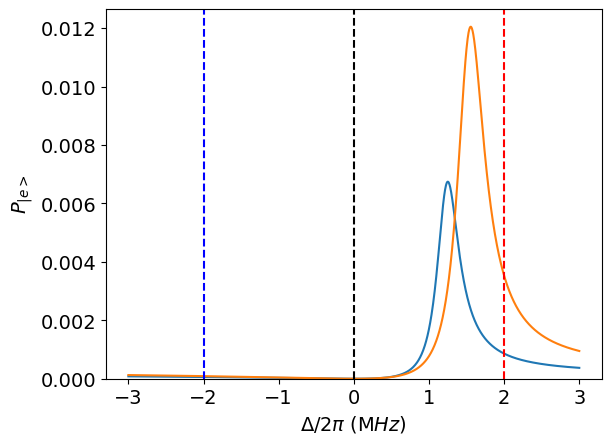

In [31]:
plt.figure()
#plt.plot(np.linspace(-10*GammaJgJe,20*GammaJgJe,200),pope1)
plt.plot(np.linspace(Dmin_,Dmax_,nn_),pop_es)
plt.plot(np.linspace(Dmin_,Dmax_,nn_),pop_es1)
#plt.plot(np.linspace(Dmin_,Dmax_,nn_),pop_es2)

plt.ylabel('$P_{|e>}$')
plt.xlabel('$Δ/2π \ (ΜHz)$')
plt.axvline(+ omega, linestyle='--',color='red')
plt.axvline(0, linestyle='--',color='black')
plt.axvline(- omega, linestyle='--',color='blue')
plt.ylim(0)

#plt.xlim(18,28)

#plt.savefig("Lu_eit_e_pi.png",bbox_inches = "tight")
plt.show()

In [33]:
Gamma = 20
Deltad = 60
Omegasp = 16.5
Omegasm = Omegasp
Omegap = Omegasp
deltab = 10
Deltap = Deltad + deltab #metavlito

In [34]:
pop_es2 = steck(Gamma,Omegasp,Omegasm,Omegap,Deltad,Deltap,deltab, eta, Dmin_, Dmax_, nn_)

  0%|          | 0/2000 [00:00<?, ?it/s]C:\Users\kfouka\AppData\Local\Temp\ipykernel_13360\1920263864.py:91: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rhos1[j,i] = rho1[j+i*N]
C:\Users\kfouka\AppData\Local\Temp\ipykernel_13360\1920263864.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rhos_1[j,i] = rho_1[j+i*N]
100%|██████████| 2000/2000 [00:01<00:00, 1676.01it/s]


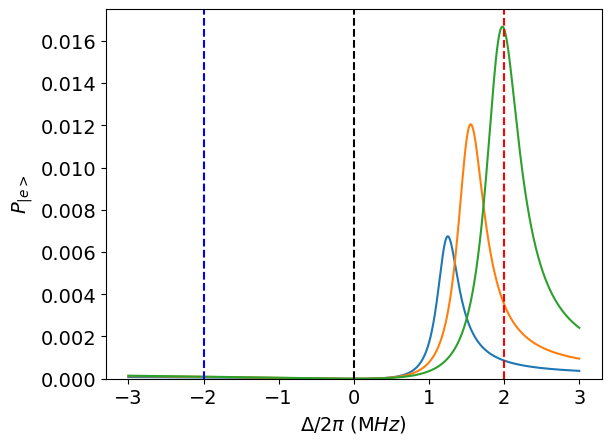

In [35]:
plt.figure()
#plt.plot(np.linspace(-10*GammaJgJe,20*GammaJgJe,200),pope1)
plt.plot(np.linspace(Dmin_,Dmax_,nn_),pop_es)
plt.plot(np.linspace(Dmin_,Dmax_,nn_),pop_es1)
plt.plot(np.linspace(Dmin_,Dmax_,nn_),pop_es2)

plt.ylabel('$P_{|e>}$')
plt.xlabel('$Δ/2π \ (ΜHz)$')
plt.axvline(omega, linestyle='--',color='red')
plt.axvline(0, linestyle='--',color='black')
plt.axvline(-omega, linestyle='--',color='blue')
plt.ylim(0)

#plt.xlim(18,28)

#plt.savefig("Lu_eit_e_pi.png",bbox_inches = "tight")
plt.show()

In [36]:
step_ = (Dmax_-Dmin_)/nn_

In [37]:
pop_es[int((omega -Dmin_)/step_)]-pop_es[int(( -omega-Dmin_)/step_)]

(0.0007993464764716193+2.5409699670483347e-07j)

In [38]:
pop_es1[int((omega -Dmin_)/step_)]-pop_es1[int(( -omega-Dmin_)/step_)]

(0.0034338261120977435+1.1149799200421601e-06j)

In [39]:
pop_es2[int((omega -Dmin_)/step_)]-pop_es2[int(( -omega-Dmin_)/step_)]

(0.016453996440799232+5.461701524471057e-06j)

In [40]:
wsteck = np.array([pop_es[int((omega -Dmin_)/step_)]-pop_es[int(( -omega-Dmin_)/step_)],
                   pop_es1[int((omega -Dmin_)/step_)]-pop_es1[int(( -omega-Dmin_)/step_)],
                   pop_es2[int((omega -Dmin_)/step_)]-pop_es2[int(( -omega-Dmin_)/step_)]])

In [41]:
wabs

array([ 8.48737541e-05,  4.69350848e-05, -2.75625152e-06])

## Fluctuation spectrum

In [42]:
def S_(Gamma, Deltad, deltab, Deltap, Omegasp, Omegasm, Omegap,omega, eta):
    H1 = -np.pi*(Omegasm*e*p.dag() + Omegap*e*z.dag() + Omegasp*e*m.dag())
    H2 = -np.pi*Omegasm*p*e.dag() + 2*np.pi*(Deltad + deltab)*p*p.dag()
    H3 = -np.pi*Omegap*z*e.dag() + 2*np.pi*Deltap*z*z.dag()
    H4 = -np.pi*Omegasp*m*e.dag() + 2*np.pi*(Deltad - deltab)*m*m.dag()

    H0 = H1 + H2 + H3 + H4

    c1 = np.sqrt(2*np.pi*Gamma/3)*p*e.dag()
    c2 = np.sqrt(2*np.pi*Gamma/3)*z*e.dag()
    c3 = np.sqrt(2*np.pi*Gamma/3)*m*e.dag()

    c = [c1,c2,c3]
    rho = steadystate(H0,c) #!
    
    L0 = 0*spre(c[0])*spost(c[0].dag())
    for i in range(len(c)):
        L0 += spre(c[i])*spost(c[i].dag()) - 0.5*(spre(c[i].dag()*c[i]) + spost(c[i].dag()*c[i]))

    L0 += -1j*(spre(H0) - spost(H0))
    
    #L0 = np.array(L0)
    L0 = L0.data_as('ndarray')

    V1 = -np.pi*1j*(eta*Omegasm*e*p.dag() -eta*Omegap*e*z.dag() + eta*Omegasp*e*m.dag())
    V1 = V1 + V1.dag()
    V1rho = V1*rho

    V1rho = operator_to_vector(V1rho)
    #V1rho = np.array(V1rho)
    V1rho = V1rho.data_as('ndarray')

    eye = np.eye(N**2)
    inve = -inv((L0+1j*2*np.pi*omega*eye))

    s = inve@V1rho

    S = np.zeros((N,N),dtype=np.complex_)
    for i in range(N):
        for j in range(N):
            S[j,i] = s[N*i+j][0]
            
    #V1 = np.array(V1)
    V1 =V1.data_as('ndarray')
    S = np.matmul(V1,S)

    return np.matrix.trace(S)

In [43]:
Gamma = 20
Deltad = 60
Omegasp = 16.5
Omegasm = Omegasp
Omegap = 0.5*Omegasp
deltab = 10
Deltap = Deltad + deltab #metavlito

Dmin_=-3
Dmax_=3
nn_=2000

In [44]:
Am = S_(Gamma, Deltad, deltab, Deltap, Omegasp, Omegasm, Omegap, omega,eta)

In [45]:
Ap = S_(Gamma, Deltad, deltab, Deltap, Omegasp, Omegasm, Omegap, -omega,eta)

In [46]:
(2*Am-2*Ap).real

0.0008009170820822037

In [47]:
Ss = []
for v in tqdm(np.linspace(Dmin_,Dmax_,nn_)):
    Ss.append(S_(Gamma, Deltad, deltab, Deltap, Omegasp, Omegasm, Omegap, v,eta))

100%|██████████| 2000/2000 [00:02<00:00, 781.70it/s]


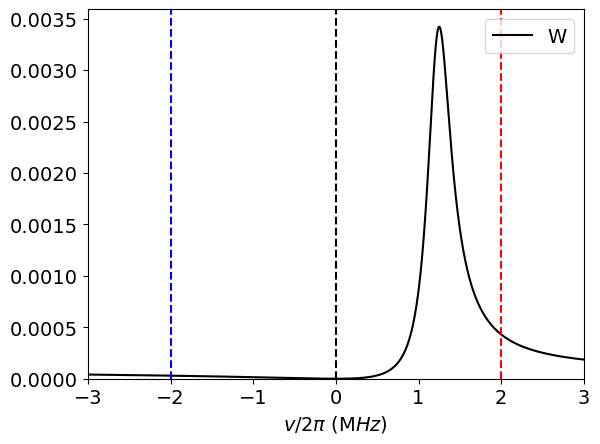

In [48]:
plt.figure()
#plt.plot(np.linspace(-10*GammaJgJe,20*GammaJgJe,200),pope1)
plt.plot(np.linspace(Dmin_,Dmax_,nn_),Ss,label='W',color='black')
plt.xlabel('$v/2π \ (ΜHz)$')
plt.ylim(0)
plt.axvline(omega, linestyle='--',color='red')
plt.axvline(0, linestyle='--',color='black')
plt.axvline(-omega, linestyle='--',color='blue')

plt.xlim(-3,3)
plt.legend()


plt.show()

In [49]:
#parameters Ytterbium 1/2π (MHz) ####2!
Gamma = 20
Deltad = 60
Omegasp = 16.5
Omegasm = Omegasp
Omegap = 0.75*Omegasp
deltab = 10
Deltap = Deltad + deltab #metavlito

In [50]:
Am1 = S_(Gamma, Deltad, deltab, Deltap, Omegasp, Omegasm, Omegap, omega,eta)

In [51]:
Ap1 = S_(Gamma, Deltad, deltab, Deltap, Omegasp, Omegasm, Omegap, -omega,eta)

In [52]:
(2*Am1-2*Ap1).real

0.0034554385101198174

In [53]:
Ss1 = []
for v in tqdm(np.linspace(Dmin_,Dmax_,nn_)):
    Ss1.append(S_(Gamma, Deltad, deltab, Deltap, Omegasp, Omegasm, Omegap, v,eta))

100%|██████████| 2000/2000 [00:02<00:00, 749.61it/s]


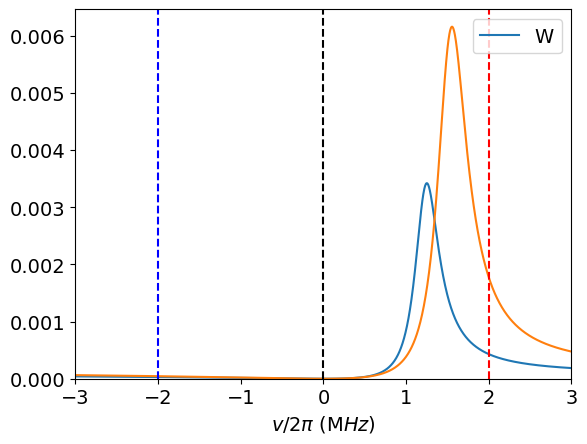

In [54]:
plt.figure()
#plt.plot(np.linspace(-10*GammaJgJe,20*GammaJgJe,200),pope1)
plt.plot(np.linspace(Dmin_,Dmax_,nn_),Ss,label='W')
plt.plot(np.linspace(Dmin_,Dmax_,nn_),Ss1)
plt.xlabel('$v/2π \ (ΜHz)$')
plt.ylim(0)
plt.axvline(omega, linestyle='--',color='red')
plt.axvline(0, linestyle='--',color='black')
plt.axvline(-omega, linestyle='--',color='blue')

plt.xlim(-3,3)
plt.legend()


plt.show()

In [55]:
Gamma = 20
Deltad = 60
Omegasp = 16.5
Omegasm = Omegasp
Omegap = Omegasp
deltab = 10
Deltap = Deltad + deltab #metavlito

In [56]:
Am2 = S_(Gamma, Deltad, deltab, Deltap, Omegasp, Omegasm, Omegap, omega,eta)

In [57]:
Ap2 = S_(Gamma, Deltad, deltab, Deltap, Omegasp, Omegasm, Omegap, -omega,eta)

In [58]:
(2*Am2-2*Ap2).real

0.016887850766988836

In [59]:
Ss2 = []
for v in tqdm(np.linspace(Dmin_,Dmax_,nn_)):
    Ss2.append(S_(Gamma, Deltad, deltab, Deltap, Omegasp, Omegasm, Omegap, v,eta))

100%|██████████| 2000/2000 [00:02<00:00, 820.03it/s]


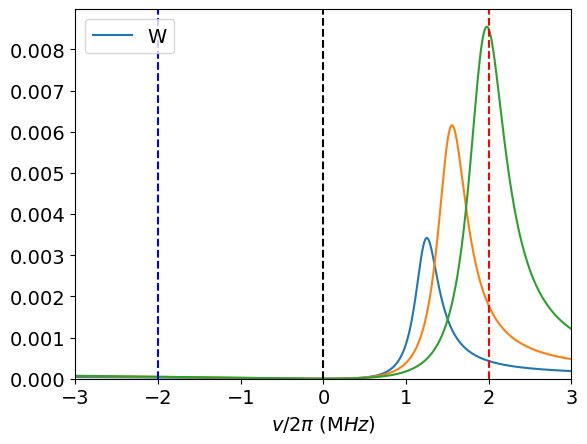

In [60]:
plt.figure()
#plt.plot(np.linspace(-10*GammaJgJe,20*GammaJgJe,200),pope1)
plt.plot(np.linspace(Dmin_,Dmax_,nn_),Ss,label='W')
plt.plot(np.linspace(Dmin_,Dmax_,nn_),Ss1)
plt.plot(np.linspace(Dmin_,Dmax_,nn_),Ss2)
plt.xlabel('$v/2π \ (ΜHz)$')
plt.ylim(0)
plt.axvline(omega, linestyle='--',color='red')
plt.axvline(0, linestyle='--',color='black')
plt.axvline(-omega, linestyle='--',color='blue')

plt.xlim(-3,3)
plt.legend()


plt.show()

In [61]:
w = np.array([(2*Am-2*Ap).real,(2*Am1-2*Ap1).real,(2*Am2-2*Ap2).real])

In [62]:
w

array([0.00080092, 0.00345544, 0.01688785])

In [63]:
wsteck.real

array([0.00079935, 0.00343383, 0.016454  ])

## Cooling

In [69]:
t = np.loadtxt(""+str(path_name)+"cooling_double_EIT.txt")[:, 0]
n = np.loadtxt(""+str(path_name)+"cooling_double_EIT.txt")[:, 1]

In [70]:
t1 = np.loadtxt(""+str(path_name)+"cooling_double_EIT_1.txt")[:, 0]
n1 = np.loadtxt(""+str(path_name)+"cooling_double_EIT_1.txt")[:, 1]

In [71]:
t2 = np.loadtxt(""+str(path_name)+"cooling_double_EIT_2.txt")[:, 0]
n2 = np.loadtxt(""+str(path_name)+"cooling_double_EIT_2.txt")[:, 1]

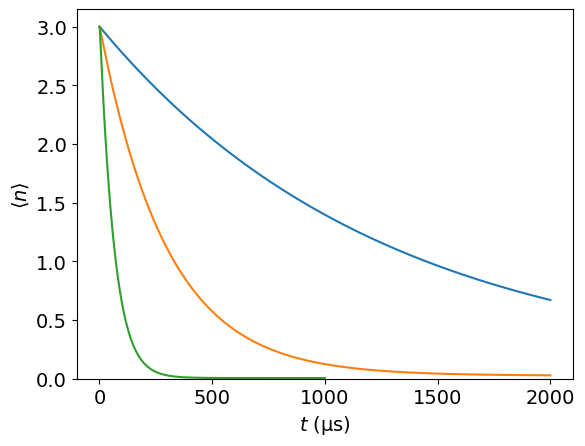

In [72]:
plt.figure()
#plt.title("I=1")

#plt.plot(np.linspace(-10*GammaJgJe,20*GammaJgJe,200),pope1)
plt.plot(t,n)
plt.plot(t1,n1)
plt.plot(t2,n2)

plt.ylabel('$\\langle n \\rangle$')
plt.xlabel('$t$ (μs)')
plt.ylim(0)
#plt.axvline(10.787075035802768, linestyle='--')
#plt.axvline(65, linestyle='--' )
#plt.xlim(0,400)


#plt.legend()
#plt.savefig("I1_cooling_diff_in_state.png",bbox_inches = "tight")
plt.show()

In [73]:
def func(t,a,b,c):
    return a*np.exp(-b*t) + c*(1-np.exp(-b*t))

In [74]:
p0 = (3, .001,.001)
popt, pcov = curve_fit(func,t,n,p0)
popt

array([3.00229836e+00, 7.91749941e-04, 6.82015900e-02])

In [75]:
p0 = (3, .001,.001)
popt1, pcov = curve_fit(func,t1,n1,p0)
popt1

array([3.0167819 , 0.00338412, 0.02412985])

In [76]:
p0 = (3, .001,.001)
popt2, pcov = curve_fit(func,t2[:350],n2[:350],p0)
popt2

array([ 3.09072466,  0.01552679, -0.00667858])

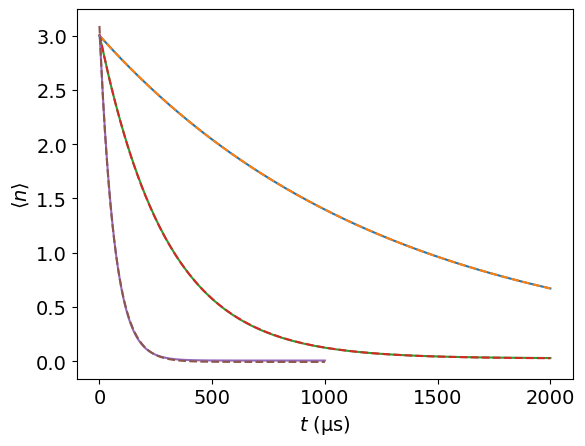

In [77]:

plt.figure()
#plt.title("I=1")

#plt.plot(np.linspace(-10*GammaJgJe,20*GammaJgJe,200),pope1)
plt.plot(t,n)
plt.plot(t,func(t, *popt),'--')
plt.plot(t1,n1)
plt.plot(t1,func(t1, *popt1),'--')
plt.plot(t2,n2)
plt.plot(t2,func(t2, *popt2),'--')

plt.ylabel('$\\langle n \\rangle$')
plt.xlabel('$t$ (μs)')
#plt.ylim(0)
#plt.axvline(10.787075035802768, linestyle='--')
#plt.axvline(65, linestyle='--' )
#plt.xlim(0,2)
#plt.yscale("log")


#plt.legend()
#plt.savefig("I1_cooling_diff_in_state.png",bbox_inches = "tight")
plt.show()

In [78]:
wexp = np.array([popt[1],popt1[1],popt2[1]])

In [79]:
plt.rcParams.update({'font.size': 8})

In [80]:
wabs

array([ 8.48737541e-05,  4.69350848e-05, -2.75625152e-06])

In [81]:
wsteck

array([0.00079939+2.27314551e-07j, 0.00343401+9.97137896e-07j,
       0.01645493+4.89269957e-06j])

C:\Users\kfouka\AppData\Local\anaconda3\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\kfouka\AppData\Local\anaconda3\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


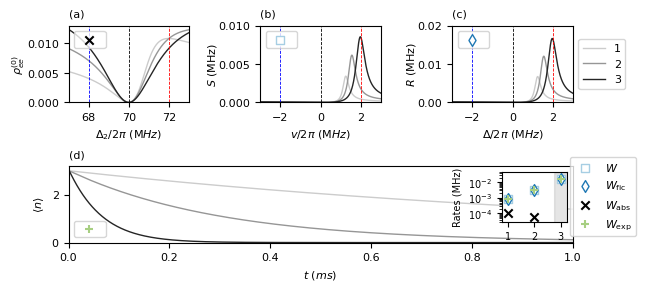

In [161]:
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)

fig = plt.figure(constrained_layout=True,figsize=(5.8,2.8))

gs = GridSpec(2, 3, figure=fig)
#gs.update(wspace=0.005, hspace=0.05)
ax1 = fig.add_subplot(gs[0, 0])
# identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))


ax1.set_title(r'(a)',loc='left',fontdict={'fontsize': 8})
ax1.plot(np.linspace(Dmin,Dmax,nn),pop_e,color='#cccccc',linewidth=1)
ax1.plot(np.linspace(Dmin,Dmax,nn),pop_e1,color='#969696',linewidth=1)
ax1.plot(np.linspace(Dmin,Dmax,nn),pop_e2,color='#252525',linewidth=1)
ax1.scatter([3],2*wabs[-1],marker='x',label='$\,$',color='black')
ax1.axvline(Deltap + omega, linestyle='--',color='red',linewidth=0.6)
ax1.axvline(Deltap, linestyle='--',color='black',linewidth=0.6)
ax1.axvline(Deltap - omega, linestyle='--',color='blue',linewidth=0.6)
ax1.set_xlim(67,73)
ax1.set_ylim(0)
ax1.set_ylabel(r'$\rho_{ee}^{(0)}$',labelpad=0)
ax1.set_xlabel('$Δ_{2}/2π \ (ΜHz)$')
ax1.legend(loc='upper left',alignment='left',handletextpad=0.05,borderpad=0.3)



ax3 = fig.add_subplot(gs[0, 1])
ax3.set_title(r'(b)',loc='left',fontdict={'fontsize': 8})
ax3.plot(np.linspace(Dmin_,Dmax_,nn_),Ss,color='#cccccc',linewidth=1)
ax3.plot(np.linspace(Dmin_,Dmax_,nn_),Ss1,color='#969696',linewidth=1)
ax3.plot(np.linspace(Dmin_,Dmax_,nn_),Ss2,color='#252525',linewidth=1)
ax3.axvline( omega, linestyle='--',color='red',linewidth=0.6)
ax3.axvline(0, linestyle='--',color='black',label='',linewidth=0.6)
ax3.axvline( - omega, linestyle='--',color='blue',linewidth=0.6)
ax3.scatter([1],w.real[-1],marker='s',label=r'$\,$',color='white',edgecolor = '#a6cee3')
ax3.set_ylabel('$S $ (MHz)',labelpad=0)
ax3.set_xlabel('$v/2π \ (ΜHz)$')
ax3.set_ylim(0,1e-2)
ax3.set_xlim(-3,3)
ax3.legend(loc='upper left',alignment='left',handletextpad=0.05,borderpad=0.3)


ax2 = fig.add_subplot(gs[0, 2])
ax2.set_title(r'(c)',loc='left',fontdict={'fontsize': 8})
line1,=ax2.plot(np.linspace(Dmin_,Dmax_,nn_),pop_es,color='#cccccc',label='1',linewidth=1)
line2,=ax2.plot(np.linspace(Dmin_,Dmax_,nn_),pop_es1,color='#969696',label='2',linewidth=1)
line3,=ax2.plot(np.linspace(Dmin_,Dmax_,nn_),pop_es2,color='#252525',label='3',linewidth=1)
ax2.axvline( omega, linestyle='--',color='red',linewidth=0.6)
ax2.axvline(0, linestyle='--',color='black',linewidth=0.6)
ax2.axvline( - omega, linestyle='--',color='blue',linewidth=0.6)
line4=ax2.scatter([1,2,3],wsteck.real+10,marker='d',label=r'$\,$',color='white',edgecolor = '#1f78b4')
ax2.set_ylabel('$R$ (MHz)',labelpad=0)
ax2.set_xlabel('$Δ/2π \ (ΜHz)$')
ax2.set_ylim(0,2e-2)
ax2.set_xlim(-3,3)
ax2.ticklabel_format(axis='y', scilimits=[-4, -1])
first_legend =plt.legend(handles=[line1,line2,line3],loc='center left',prop={'size': 8},bbox_to_anchor=(1, 0.5))
ax2.add_artist(first_legend)
second_legend = plt.legend(handles=[line4],loc='upper left',alignment='left',handletextpad=0.05,borderpad=0.3)



ax4 = fig.add_subplot(gs[1, :])
ax4.set_title(r'(d)',loc='left',fontdict={'fontsize': 8})
ax4.plot(t*1e-3,n,color='#cccccc',linewidth=1)
ax4.plot(t1*1e-3,n1,color='#969696',linewidth=1)
ax4.plot(t2*1e-3,n2,color='#252525',linewidth=1)
ax4.scatter([1,2,3],np.array(wexp)+10,marker='+',label=r'$\,$',color='#a7cf82')
#plt.plot(tlist,ne2)
ax4.set_ylabel(r'$ \langle n \rangle $')
ax4.set_xlabel(r'$t \ (ms)$')
ax4.set_ylim(0,3.2)
ax4.set_xlim(0,1)
ax4.legend(loc='lower left',alignment='left',handletextpad=0.05,borderpad=0.3,columnspacing=0.05)

#plt.xlim(0,100)
#ax4.legend()

inset_ax = inset_axes(ax4, width="13%", height=0.5, loc="upper right")
#inset_ax.set_title(r'(e)',loc='left',fontdict={'fontsize': 8},pad=5)
inset_ax.fill_between(np.linspace(2.75,3.25,1000),y1=2e-5,y2=4e-2, color='grey', alpha=0.2)
inset_ax.scatter([1,2,3],w.real,marker='s',label=r'$W$',color='white',edgecolor = '#a6cee3')
inset_ax.scatter([1,2,3],wsteck.real,marker='d',label=r'$W_{\text{fic}}$',color='white',edgecolor = '#1f78b4')
inset_ax.scatter([1,2,3],1.3*wabs,marker='x',label=r'$W_{\text{abs}}$',color='black')
inset_ax.scatter([1,2,3],wexp,marker='+',label=r'$W_{\text{exp}}$',color='#a7cf82')
inset_ax.set_xticks([1,2,3])
inset_ax.set_xticklabels(["1","2","3"])
inset_ax.set_ylim(3e-5,5e-2)
inset_ax.set_xlim(0.75,3.25)
inset_ax.tick_params(labelsize=7)
inset_ax.set_yscale('log')
inset_ax.set_ylabel('Rates (MHz)',fontsize=7)
inset_ax.legend(loc='center left',prop={'size': 8},bbox_to_anchor=(0.95, 0.5))

#plt.xlim(45,55)

#fig.suptitle("GridSpec")
#format_axes(fig)

plt.savefig("double_eit_all_abs.pdf",bbox_inches = "tight")


plt.show()